In [2]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

# For division in Python 3
from __future__ import division

In [6]:
import yfinance as yf

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Fetch the data
data = {}
for stock in tech_list:
    data[stock] = yf.download(stock, start=start, end=end)

# Assign the data to individual variables
for stock, df in data.items():
    globals()[stock] = df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.248108,57549400,NaN,NaN,NaN
2023-10-18,175.580002,177.580002,175.110001,175.839996,174.944794,54764400,NaN,NaN,NaN
2023-10-19,176.039993,177.839996,175.190002,175.460007,174.566727,59302900,NaN,NaN,NaN
2023-10-20,175.309998,175.419998,172.639999,172.880005,171.999863,64189300,NaN,NaN,NaN
2023-10-23,170.910004,174.009995,169.929993,173.000000,172.119247,55980100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500,227.228999,225.669499,223.219453
2024-10-11,229.300003,229.410004,227.339996,227.550003,227.550003,31759200,227.205000,225.921999,223.408302
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100,227.035001,226.670999,223.642186


In [15]:
AAPL.isna().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     9
MA for 20 days    19
MA for 50 days    49
dtype: int64

In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,196.478730,198.262302,194.798016,196.639960,196.232078,5.891109e+07
std,20.809996,21.045345,20.401666,20.788912,20.983262,3.003292e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,181.270004,182.759995,179.889999,181.524998,180.947186,4.360965e+07
50%,190.919998,192.134995,189.620003,191.139999,190.633041,5.259280e+07
75%,218.754997,220.497505,216.037495,218.404999,218.152489,6.502268e+07
max,236.479996,237.490005,233.089996,234.820007,234.548523,3.186799e+08


In [16]:
AAPL.duplicated().sum()

np.int64(0)

In [20]:
AAPL["Date"] = pd.to_datetime(AAPL.index)

AAPL['Month']=AAPL["Date"].dt.month

AAPL['Year']=AAPL["Date"].dt.year

AAPL['Day']=AAPL["Date"].dt.day
AAPL

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Date,Month,Year,Day
Date,,,,,,,,,,,,,
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.248108,57549400,NaN,NaN,NaN,2023-10-17,10,2023,17
2023-10-18,175.580002,177.580002,175.110001,175.839996,174.944794,54764400,NaN,NaN,NaN,2023-10-18,10,2023,18
2023-10-19,176.039993,177.839996,175.190002,175.460007,174.566727,59302900,NaN,NaN,NaN,2023-10-19,10,2023,19
2023-10-20,175.309998,175.419998,172.639999,172.880005,171.999863,64189300,NaN,NaN,NaN,2023-10-20,10,2023,20
2023-10-23,170.910004,174.009995,169.929993,173.000000,172.119247,55980100,NaN,NaN,NaN,2023-10-23,10,2023,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500,227.228999,225.669499,223.219453,2024-10-10,10,2024,10
2024-10-11,229.300003,229.410004,227.339996,227.550003,227.550003,31759200,227.205000,225.921999,223.408302,2024-10-11,10,2024,11
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100,227.035001,226.670999,223.642186,2024-10-14,10,2024,14


In [8]:
# General Info about Apple Stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-10-17 to 2024-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [27]:
# Convert Date to datetime format
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

# Calculate daily ROI
AAPL['ROI'] = AAPL['Close'].pct_change() * 100  # Calculate percentage change and convert to percentage

# Fill the first ROI value with 0 (or NaN if preferred)
AAPL['ROI'] = AAPL['ROI'].fillna(0)
# Calculate 10-day Moving Average
AAPL['MA_10'] = AAPL['Close'].rolling(window=10).mean()

# Calculate 14-day RSI
delta = AAPL['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
AAPL['RSI'] = 100 - (100 / (1 + rs))

# Fill NaN values by assigning back to the columns
AAPL['MA_10'] = AAPL['MA_10'].fillna(0)
AAPL['RSI'] = AAPL['RSI'].fillna(0)

AAPL

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Date,Month,Year,Day,ROI,MA_10,RSI
Date,,,,,,,,,,,,,,,,
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.248108,57549400,NaN,NaN,NaN,2023-10-17,10,2023,17,0.000000,0.000000,0.000000
2023-10-18,175.580002,177.580002,175.110001,175.839996,174.944794,54764400,NaN,NaN,NaN,2023-10-18,10,2023,18,-0.739485,0.000000,0.000000
2023-10-19,176.039993,177.839996,175.190002,175.460007,174.566727,59302900,NaN,NaN,NaN,2023-10-19,10,2023,19,-0.216100,0.000000,0.000000
2023-10-20,175.309998,175.419998,172.639999,172.880005,171.999863,64189300,NaN,NaN,NaN,2023-10-20,10,2023,20,-1.470422,0.000000,0.000000
2023-10-23,170.910004,174.009995,169.929993,173.000000,172.119247,55980100,NaN,NaN,NaN,2023-10-23,10,2023,23,0.069409,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500,227.228999,225.669499,223.219453,2024-10-10,10,2024,10,-0.217827,227.228999,51.260500
2024-10-11,229.300003,229.410004,227.339996,227.550003,227.550003,31759200,227.205000,225.921999,223.408302,2024-10-11,10,2024,11,-0.650537,227.205000,51.632410
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100,227.035001,226.670999,223.642186,2024-10-14,10,2024,14,1.647989,227.035001,55.468982


<Axes: xlabel='Date'>

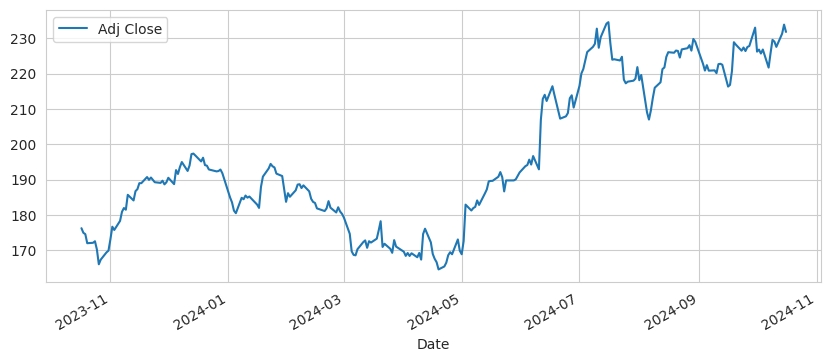

In [24]:

# Historical view of the closing price of Apple stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

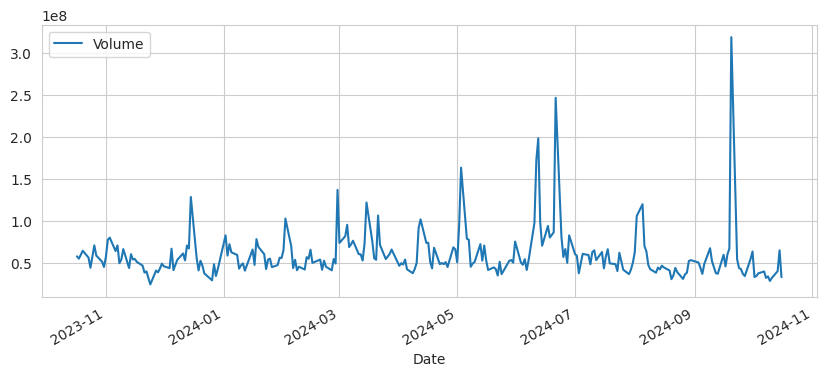

In [10]:
# Historical view of the total volume of Apple stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

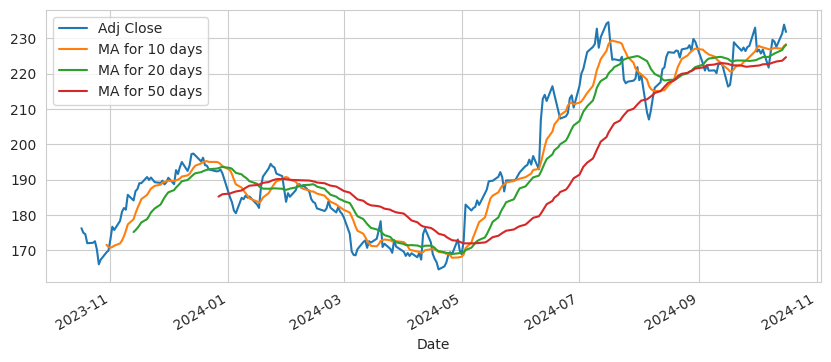

In [13]:
# Calculation of moving averages for 10, 20 and 50 days of Apple stocks
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" % str(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()


# Hostorical view of the moving averages of Closing Price of Apple Stock
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))